## Basic plots



In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Line plot

Let's plot a few sine functions with different line types; we assign a label to each trace, which can be displayed in a legend.

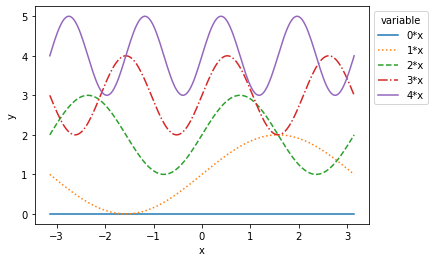

In [16]:
x = np.linspace(-np.pi,np.pi, 200)

lts = ['-',':','--','-.','-']

for i in range(5):
    plt.plot(x, np.sin(i*x)+i,lts[i],label="{0}*x".format(i))
    
plt.ylabel("y")
plt.xlabel("x")
plt.legend(ncol=1,bbox_to_anchor=(1.0,1), title='variable')
plt.show()

## Scatter plot

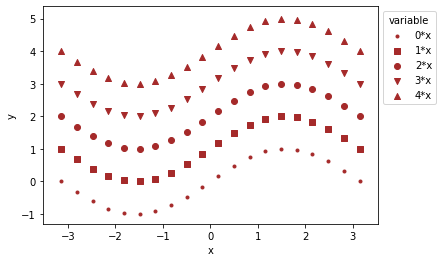

In [34]:
x = np.linspace(-np.pi,np.pi, 20)

marker = ["." , ",", "o", "v", "^"]
for i in range(5):
    plt.scatter(x, np.sin(x)+i, c = 'brown', marker=marker[i], label="{0}*x".format(i))
    
plt.ylabel("y")
plt.xlabel("x")
plt.legend(ncol=1,bbox_to_anchor=(1.0,1), title='variable')
plt.show()

## Subplots

To display multiple plots side-by-side, set up a subplot. Note the slightly different syntax for labels etc. 

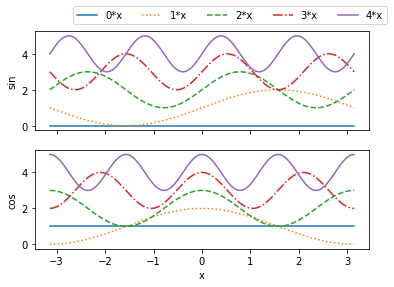

In [5]:
fig,ax=plt.subplots(2,1,sharex='col')

for i in range(5):
    ax[0].plot(x,np.sin(i*x)+i,lts[i],label="{0}*x".format(i))
    ax[1].plot(x,np.cos(i*x)+i,lts[i]                        )
    
ax[0].set_ylabel("sin")
ax[1].set_ylabel("cos")
ax[1].set_xlabel("x")
ax[0].legend(ncol=5,bbox_to_anchor=(0.1,1.02))
plt.show()

## Grammar of graphics with Pandas

An alternative is to create plots following _a grammar of graphics_, such as implemented in [plotly](https://plotly.com/python). Data should typically be prepared in long format [`Panda ` `DataFrame`s](https://pandas.pydata.org/).


In [6]:
import pandas as pd

x = np.linspace(-np.pi,np.pi, 200)
mat = [np.sin(i*x.T) + i for i in range(5)]

# set column names to refer to them
columns = ['a','b','c','d','e']

d = pd.DataFrame(dict(zip(columns, mat)))
d['x'] = x
d.head()

,a,b,c,d,e,x
0,0.0,1.000000,2.000000,3.000000,4.000000,-3.141593
1,0.0,0.968431,2.063106,2.905420,4.125960,-3.110019
2,0.0,0.936894,2.125960,2.811688,4.249913,-3.078445
3,0.0,0.905420,2.188312,2.719645,4.369885,-3.046871
4,0.0,0.874040,2.249913,2.630115,4.483966,-3.015297


Converting from this wide format to long format can be achieved with `melt`,

In [7]:
m = pd.melt(d, id_vars='x')
m.head()          

,x,variable,value
0,-3.141593,a,0.0
1,-3.110019,a,0.0
2,-3.078445,a,0.0
3,-3.046871,a,0.0
4,-3.015297,a,0.0


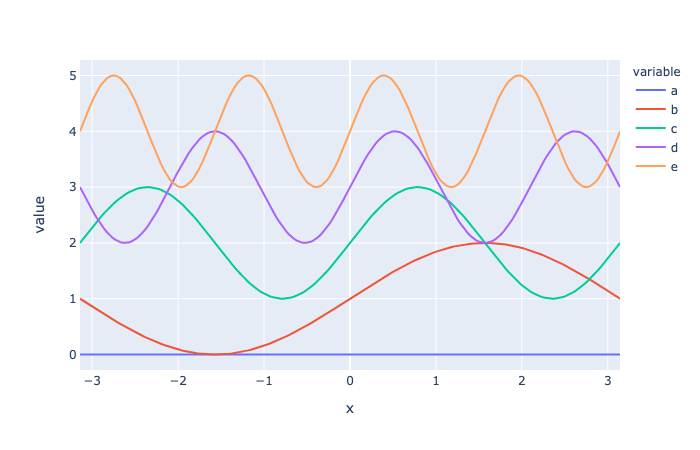

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers
# pio.renderers.default = "browser"

fig = px.line(m, x='x', y='value', color='variable')
fig.show(renderer='png')


_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/plotting/basic.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/plotting/basic.py)._